In [2]:
from pandas import read_excel, merge
from numpy import arange
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
reading_movie_file = read_excel("movies.xlsx")
reading_ratings_file = read_excel("ratings.xlsx")
reading_movie_file.tail()
reading_ratings_file.tail()
data_frame = merge(reading_movie_file,reading_ratings_file,on = "movieId")
data_frame.tail()

print(data_frame)

        movieId                                              title  \
0             1                                   Toy Story (1995)   
1             1                                   Toy Story (1995)   
2             1                                   Toy Story (1995)   
3             1                                   Toy Story (1995)   
4             1                                   Toy Story (1995)   
5             1                                   Toy Story (1995)   
6             1                                   Toy Story (1995)   
7             1                                   Toy Story (1995)   
8             1                                   Toy Story (1995)   
9             1                                   Toy Story (1995)   
10            1                                   Toy Story (1995)   
11            1                                   Toy Story (1995)   
12            1                                   Toy Story (1995)   
13            1     

In [4]:
df1 = data_frame[['userId', 'movieId', 'genres']]
df1

,userId,movieId,genres
0,7,1,Adventure|Animation|Children|Comedy|Fantasy
1,9,1,Adventure|Animation|Children|Comedy|Fantasy
2,13,1,Adventure|Animation|Children|Comedy|Fantasy
3,15,1,Adventure|Animation|Children|Comedy|Fantasy
4,19,1,Adventure|Animation|Children|Comedy|Fantasy
5,20,1,Adventure|Animation|Children|Comedy|Fantasy
6,23,1,Adventure|Animation|Children|Comedy|Fantasy
7,26,1,Adventure|Animation|Children|Comedy|Fantasy
8,30,1,Adventure|Animation|Children|Comedy|Fantasy
9,37,1,Adventure|Animation|Children|Comedy|Fantasy


                    count
(no genres listed)     18
Action              27056
Adventure           22017
Animation            6170
Children             8680
Comedy              38026
Crime               16266
Documentary          1564
Drama               44752
Fantasy             10657
Film-Noir            1140
Horror               6790
IMAX                 3156
Musical              4722
Mystery              7625
Romance             19336
Sci-Fi              15365
Thriller            25240
War                  5025
Western              1912


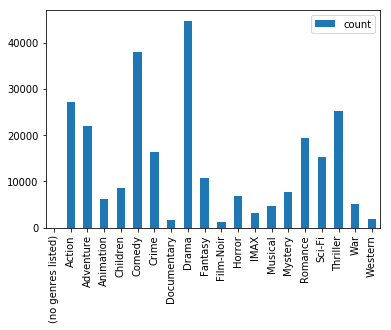

In [10]:
import pandas as pd
genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

df = pd.DataFrame(genres, columns=["genre"])
df['count'] = 0

b = []

for x in df1:
    if(x == 'genres'):
        for word in df1[x].str.split('|'):
            b.extend(word)
            
#print(b)
        
from collections import Counter

d = Counter(b)
key = d.keys()

df = pd.DataFrame(d,index=key)
df.drop(df.columns[1:], inplace=True)
df = pd.DataFrame.transpose(df)
df = df.rename(index=str, columns={"(no genres listed)": "count"})

#df['genres'] = df.index

#df.reset_index(level=0, inplace=True)

print(df)

df.plot(kind = 'bar')